In [1]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import os
import calculate_log as callog
%matplotlib inline  


In [5]:
ind_dataset='svhn'
ood_dataset=['cifar10', 'cifar100', 'lsun_resize','imagenet_resize','lsun_fix','imagenet_fix','place365','dtd']
experiment = 'resnet18_vanilla_simclr_svhn'
ae_type = 'sigmoid_AE'
prefix = 'confidence' #confidence
layer_num=9

In [6]:
epoch=500
ind=[]
ind_train=[]
ood=dict()
for i in range(layer_num):
    ood[i]=[]
    ind.append(np.loadtxt(os.path.join('trained_autoencoders',ae_type,experiment,'{}_layer_{}_in_{}_epoch_{}.txt'.format(prefix, i,ind_dataset,epoch))))
    ind_train.append(np.loadtxt(os.path.join('trained_autoencoders',ae_type,experiment,'{}_layer_{}_in_{}_epoch_{}_train.txt'.format(prefix, i,ind_dataset,epoch))))
    for j in range(len(ood_dataset)):
        ood[i].append(np.loadtxt(os.path.join('trained_autoencoders',ae_type,experiment,'{}_layer_{}_out_{}_epoch_{}_model1.txt'.format(prefix, i,ood_dataset[j],epoch))))

# ind_MD = np.load(os.path.join('/HDD0','ParkYH','deep_Mahalanobis_detector','output_features',ind_dataset,'Mahalanobis_in_{}_original_single.npy'.format(ind_dataset)))[:,:-1]
# ood_MD=[]
# for j in range(len(ood_dataset)):
#     ood_MD.append(np.load(os.path.join('/HDD0','ParkYH','deep_Mahalanobis_detector','output_features',ind_dataset,'Mahalanobis_out_{}_original_single.npy'.format(ood_dataset[j])))[:,:-1])

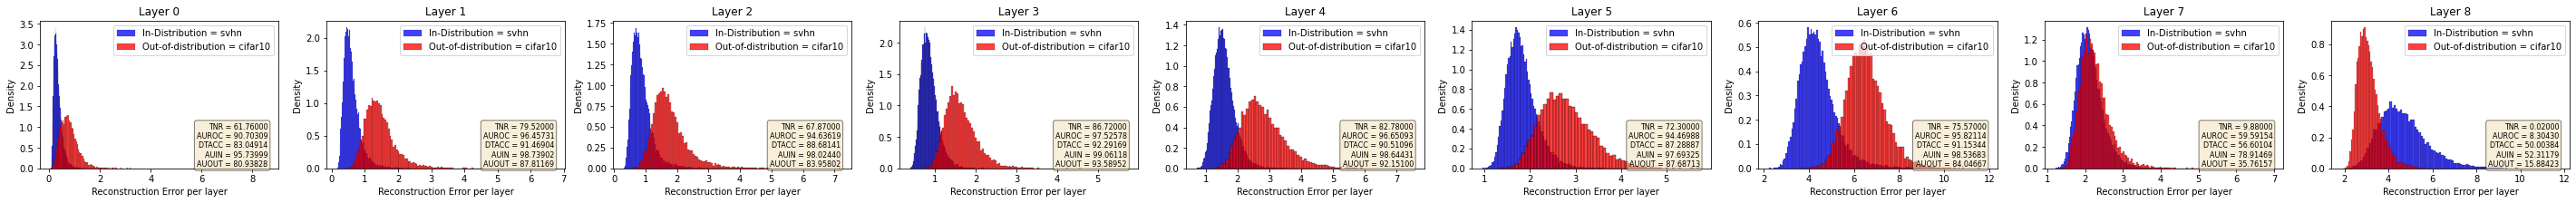

In [7]:
ood_index=0
fig,axs=plt.subplots(1,layer_num,figsize=(50,3))
results=dict()
for layer in range(layer_num):
    results[layer],_,_ = callog.metric(ind[layer],ood[layer][ood_index])
    sns.histplot(ax=axs[layer],data=-ind[layer],color='blue',stat='density')
    sns.histplot(ax=axs[layer],data=-ood[layer][ood_index],color='red',stat='density')
    axs[layer].legend(['In-Distribution = {}'.format(ind_dataset),'Out-of-distribution = {}'.format(ood_dataset[ood_index])])
    axs[layer].set_title('Layer '+str(layer))
    axs[layer].set_xlabel('Reconstruction Error per layer')

    rst = results[layer]['TMP']
    props = dict(boxstyle='round', facecolor='wheat', alpha=0.5)
    metric = 'TNR = {:.5f}\nAUROC = {:.5f}\nDTACC = {:.5f}\nAUIN = {:.5f}\nAUOUT = {:.5f}'.format(100*rst['TNR'],100*rst['AUROC'],100*rst['DTACC'],100*rst['AUIN'],100*rst['AUOUT'])
    axs[layer].text(np.max((np.max(-ind[layer]),np.max(-ood[layer][ood_index]))),0, metric, fontsize=8,horizontalalignment='right', verticalalignment='bottom', bbox=props)

# fig,axs=plt.subplots(1,18,figsize=(50,3))
# results_MD=dict()
# for layer in range(18):
#     results_MD[layer],_,_ = callog.metric(ind_MD[:,layer],ood_MD[ood_index][:,layer])
#     sns.histplot(ax=axs[layer],data=-ind_MD[:,layer],color='blue',stat='density')
#     sns.histplot(ax=axs[layer],data=-ood_MD[ood_index][:,layer],color='red',stat='density')
#     axs[layer].legend(['In-Distribution = {}'.format(ind_dataset),'Out-of-distribution = {}'.format(ood_dataset[ood_index])])
#     axs[layer].set_title('Layer '+str(layer))
#     axs[layer].set_xlabel('Mahalanobis Distance')
#     rst = results_MD[layer]['TMP']
#     props = dict(boxstyle='round', facecolor='wheat', alpha=0.5)
#     metric = 'TNR = {:.5f}\nAUROC = {:.5f}\nDTACC = {:.5f}\nAUIN = {:.5f}\nAUOUT = {:.5f}'.format(100*rst['TNR'],100*rst['AUROC'],100*rst['DTACC'],100*rst['AUIN'],100*rst['AUOUT'])
#     axs[layer].text(np.max((np.max(-ind_MD[:,layer]),np.max(-ood_MD[ood_index][:,layer]))),0, metric, fontsize=8,horizontalalignment='right', verticalalignment='bottom', bbox=props)

In [8]:
from sklearn.preprocessing import StandardScaler
ind_scaled=[]
ood_scaled=dict()
for j in range(len(ood_dataset)):
    ood_scaled[j]=[]

for i in range(layer_num):
    scaler=StandardScaler()
    scaler.fit(ind_train[i].reshape(-1,1))
    ind_scaled.append(scaler.transform(ind[i].reshape(-1,1)).reshape(-1))
    for j in range(len(ood_dataset)):
        ood_scaled[j].append(scaler.transform(ood[i][j].reshape(-1,1)).reshape(-1))

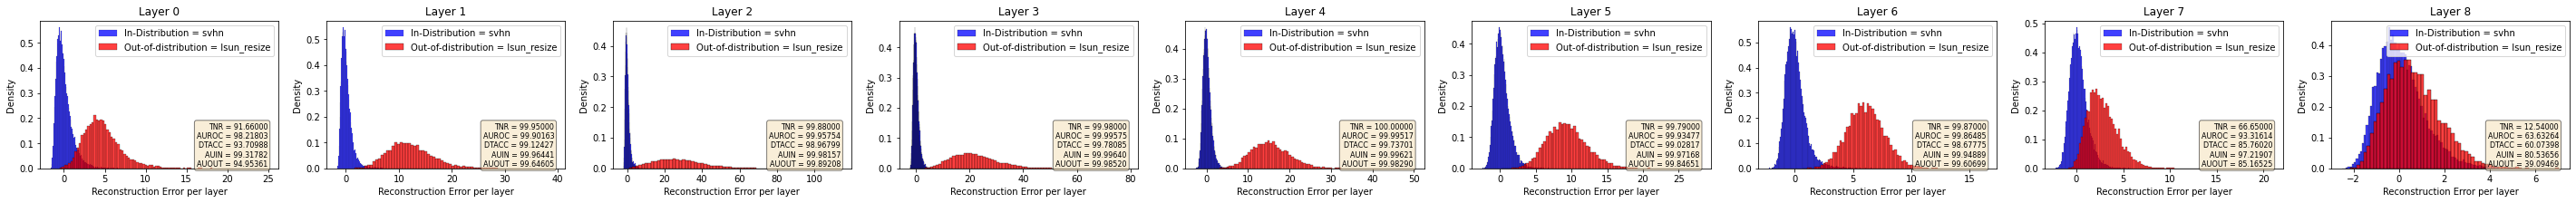

In [9]:
ood_index=2
fig,axs=plt.subplots(1,layer_num,figsize=(50,3))
results=dict()
for layer in range(layer_num):
    results[layer],_,_ = callog.metric(ind_scaled[layer],ood_scaled[ood_index][layer])
    sns.histplot(ax=axs[layer],data=-ind_scaled[layer],color='blue',stat='density')
    sns.histplot(ax=axs[layer],data=-ood_scaled[ood_index][layer],color='red',stat='density')
    axs[layer].legend(['In-Distribution = {}'.format(ind_dataset),'Out-of-distribution = {}'.format(ood_dataset[ood_index])])
    axs[layer].set_title('Layer '+str(layer))
    axs[layer].set_xlabel('Reconstruction Error per layer')

    rst = results[layer]['TMP']
    props = dict(boxstyle='round', facecolor='wheat', alpha=0.5)
    metric = 'TNR = {:.5f}\nAUROC = {:.5f}\nDTACC = {:.5f}\nAUIN = {:.5f}\nAUOUT = {:.5f}'.format(100*rst['TNR'],100*rst['AUROC'],100*rst['DTACC'],100*rst['AUIN'],100*rst['AUOUT'])
    axs[layer].text(np.max((np.max(-ind_scaled[layer]),np.max(-ood_scaled[ood_index][layer]))),0, metric, fontsize=8,horizontalalignment='right', verticalalignment='bottom', bbox=props)

In [10]:
ind_scaled_max=np.min(ind_scaled,0)
ood_scaled_max=[]
for j in range(len(ood_dataset)):
    ood_scaled_max.append(np.min(ood_scaled[j],0))

imagenet_fix
96.39 / 98.80 / 95.81


Text(60.78746087043058, 0, 'TNR = 96.39000\nAUROC = 98.80028\nDTACC = 95.81469\nAUIN = 99.58489\nAUOUT = 95.90821')

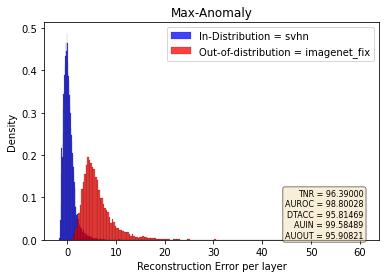

In [17]:
ood_index= 5
print(ood_dataset[ood_index])
results_max,_,_ = callog.metric(ind_scaled_max,ood_scaled_max[ood_index])
sns.histplot(data=-ind_scaled_max,color='blue',stat='density')
sns.histplot(data=-ood_scaled_max[ood_index],color='red',stat='density')
plt.legend(['In-Distribution = {}'.format(ind_dataset),'Out-of-distribution = {}'.format(ood_dataset[ood_index])])
plt.title('Max-Anomaly')
plt.xlabel('Reconstruction Error per layer')

rst = results_max['TMP']
props = dict(boxstyle='round', facecolor='wheat', alpha=0.5)
metric = 'TNR = {:.5f}\nAUROC = {:.5f}\nDTACC = {:.5f}\nAUIN = {:.5f}\nAUOUT = {:.5f}'.format(100*rst['TNR'],100*rst['AUROC'],100*rst['DTACC'],100*rst['AUIN'],100*rst['AUOUT'])
print("{:.2f} / {:.2f} / {:.2f}".format(100*rst['TNR'],100*rst['AUROC'],100*rst['DTACC']))
plt.text(np.max((np.max(-ind_scaled_max),np.max(-ood_scaled_max[ood_index]))),0, metric, fontsize=8,horizontalalignment='right', verticalalignment='bottom', bbox=props)

In [9]:
ind_layers = np.stack(ind,1)

In [10]:
ood_layers=dict()
for j in range(len(ood_dataset)):
    for i in range(18):
        if i==0:
            ood_layers[j]=ood[i][j].reshape(-1,1)
        else:
            ood_layers[j]=np.concatenate((ood_layers[j],ood[i][j].reshape(-1,1)),1)
#     ood_layers[i]=np.stack(ood[:][i],1)

KeyError: 9

In [ ]:
ind_sum = np.sum(ind_layers[:-3],1)
ood_sum=dict()
for i in range(len(ood_dataset)):
    ood_sum[i]=np.sum(ood_layers[i][:-3],1)

In [ ]:
results[layer],_,_ = callog.metric(ind_sum,ood_sum[ood_index])
sns.histplot(data=-ind_sum,color='blue',stat='density')
sns.histplot(data=-ood_sum[ood_index],color='red',stat='density')
plt.legend(['In-Distribution = {}'.format(ind_dataset),'Out-of-distribution = {}'.format(ood_dataset[ood_index])])
plt.title('Layer '+str(layer))
plt.xlabel('Reconstruction Error per layer')

rst = results[layer]['TMP']
props = dict(boxstyle='round', facecolor='wheat', alpha=0.5)
metric = 'TNR = {:.5f}\nAUROC = {:.5f}\nDTACC = {:.5f}\nAUIN = {:.5f}\nAUOUT = {:.5f}'.format(100*rst['TNR'],100*rst['AUROC'],100*rst['DTACC'],100*rst['AUIN'],100*rst['AUOUT'])
plt.text(np.max((np.max(-ind[layer]),np.max(-ood[layer][ood_index]))),0, metric, fontsize=8,horizontalalignment='right', verticalalignment='bottom', bbox=props)



In [30]:
from sklearn.decomposition import PCA
import numpy as np
from plotly.offline import plot
import plotly.graph_objs as go
from plotly.offline import init_notebook_mode
init_notebook_mode(connected=True)
import os

In [34]:
ind_features=[]
ind_train_features=[]
ood_features=[]
ood='svhn'
feature_name = 'output_simclr_permrot_resnet18'
for i in range(9):
    data=np.load(os.path.join('extracted_features',feature_name,'Features_from_layer_{}_cifar10_original_train_ind.npy'.format(i)))
    ind_train_features.append(data)

    data=np.load(os.path.join('extracted_features',feature_name,'Features_from_layer_{}_cifar10_original_test_ind.npy'.format(i)))
    ind_features.append(data)
    data=np.load(os.path.join('extracted_features',feature_name,'Features_from_layer_{}_{}_original_test_ood.npy'.format(i,ood)))
    ood_features.append(data)



In [35]:
for i in range(9):
    PCA_x = PCA(n_components=3).fit_transform(np.concatenate((ood_features[i],ind_features[i],ind_train_features[i])))
    X=PCA_x[:ood_features[i].shape[0],:]
    data = go.Scatter3d(
        x=X[:,0],
        y=X[:,1],
        z=X[:,2],
    #     text = ['point #{}'.format(i) for i in range(X.shape[0])],
        mode='markers',
    #     hoverlabel='OOD',
        marker=dict(
        size=1,
        color='red',   
    #     colorscale='rainbow',
        )
    )

    X=PCA_x[ood_features[i].shape[0]:-ind_train_features[i].shape[0],:]
    data2 = go.Scatter3d(
        x=X[:,0],
        y=X[:,1],
        z=X[:,2],
    #     text = ['point #{}'.format(i) for i in range(X.shape[0])],
        mode='markers',
    #     hoverlabel='IND',
        marker=dict(
        size=1,
        color='blue',   
    #     colorscale='rainbow',
        )
    )
    X=PCA_x[-ind_train_features[i].shape[0]:,:]
    data3 = go.Scatter3d(
        x=X[:,0],
        y=X[:,1],
        z=X[:,2],
    #     text = ['point #{}'.format(i) for i in range(X.shape[0])],
        mode='markers',
    #     hoverlabel='IND',
        marker=dict(
        size=1,
        color='green',   
    #     colorscale='rainbow',
        )
    )

    
    layout = go.Layout(
        autosize=False,
        width=1000,
        height=1000,
    #     margin=go.Margin(
    #         l=50,
    #         r=50,
    #         b=100,
    #         t=100,
    #         pad=4
    #     ),
        #paper_bgcolor='#7f7f7f',
        #plot_bgcolor='#c7c7c7'
    )
    fig = go.Figure(data=[data,data2,data3], layout=layout)

    plot(fig, filename=os.path.join('extracted_features',feature_name,'{}_layer{}'.format(ood,i)+'.html'), auto_open=False)